In [32]:
%matplotlib inline

In [33]:
#Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [34]:
file = "Resources/car_insurance_claim.csv"
claim_data = pd.read_csv(file)
claim_data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [35]:
# data shape 
#claim_data.dtypes
claim_data.shape

(10302, 27)

In [36]:
claim_data.count()

ID            10302
KIDSDRIV      10302
BIRTH         10302
AGE           10295
HOMEKIDS      10302
YOJ            9754
INCOME         9732
PARENT1       10302
HOME_VAL       9727
MSTATUS       10302
GENDER        10302
EDUCATION     10302
OCCUPATION     9637
TRAVTIME      10302
CAR_USE       10302
BLUEBOOK      10302
TIF           10302
CAR_TYPE      10302
RED_CAR       10302
OLDCLAIM      10302
CLM_FREQ      10302
REVOKED       10302
MVR_PTS       10302
CLM_AMT       10302
CAR_AGE        9663
CLAIM_FLAG    10302
URBANICITY    10302
dtype: int64

In [37]:
#drop rows with missing information 
claim_data = claim_data.dropna(how='any')

In [38]:
claim_data.count()

ID            7657
KIDSDRIV      7657
BIRTH         7657
AGE           7657
HOMEKIDS      7657
YOJ           7657
INCOME        7657
PARENT1       7657
HOME_VAL      7657
MSTATUS       7657
GENDER        7657
EDUCATION     7657
OCCUPATION    7657
TRAVTIME      7657
CAR_USE       7657
BLUEBOOK      7657
TIF           7657
CAR_TYPE      7657
RED_CAR       7657
OLDCLAIM      7657
CLM_FREQ      7657
REVOKED       7657
MVR_PTS       7657
CLM_AMT       7657
CAR_AGE       7657
CLAIM_FLAG    7657
URBANICITY    7657
dtype: int64

In [39]:
claim_data.corr()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
ID,1.000000,0.006313,-0.015892,0.022110,-0.009792,-0.003452,-0.011063,0.006236,0.016211,-0.009004,0.002529
KIDSDRIV,0.006313,1.000000,-0.069330,0.458153,0.049358,0.007566,-0.006750,0.042874,0.051521,-0.048352,0.095404
AGE,-0.015892,-0.069330,1.000000,-0.445277,0.140391,0.006693,0.000374,-0.042717,-0.081691,0.192739,-0.118782
HOMEKIDS,0.022110,0.458153,-0.445277,1.000000,0.083158,-0.006667,0.000877,0.042760,0.067836,-0.162333,0.121060
YOJ,-0.009792,0.049358,0.140391,0.083158,1.000000,-0.015963,0.029153,-0.025852,-0.042339,0.055543,-0.063858
TRAVTIME,-0.003452,0.007566,0.006693,-0.006667,-0.015963,1.000000,-0.015523,0.009098,0.001956,-0.024245,0.057488
TIF,-0.011063,-0.006750,0.000374,0.000877,0.029153,-0.015523,1.000000,-0.020316,-0.030786,0.011552,-0.077098
CLM_FREQ,0.006236,0.042874,-0.042717,0.042760,-0.025852,0.009098,-0.020316,1.000000,0.407438,-0.029582,0.233416
MVR_PTS,0.016211,0.051521,-0.081691,0.067836,-0.042339,0.001956,-0.030786,0.407438,1.000000,-0.039629,0.232091
CAR_AGE,-0.009004,-0.048352,0.192739,-0.162333,0.055543,-0.024245,0.011552,-0.029582,-0.039629,1.000000,-0.122344


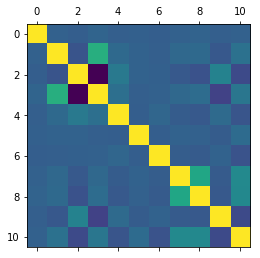

In [40]:
plt.matshow(claim_data.corr())

In [41]:
#Convert CLM_AMT data type to Numeric 
claim_data['CLM_AMT_CLEAN'] = claim_data['CLM_AMT'].str.replace('$','')
claim_data['CLM_AMT_CLEAN2'] = claim_data['CLM_AMT_CLEAN'].str.replace(',','')
claim_data['CLM_AMT_CLEAN2'] = pd.to_numeric(claim_data['CLM_AMT_CLEAN2'])

#convert OLDCLAIM data type to Numeric 
claim_data['OLDCLAIM_CLEAN'] = claim_data['OLDCLAIM'].str.replace('$','')
claim_data['OLDCLAIM_CLEAN2'] = claim_data['OLDCLAIM_CLEAN'].str.replace(',','')
claim_data['OLDCLAIM_CLEAN2'] = pd.to_numeric(claim_data['OLDCLAIM_CLEAN2'])

#convert INCOME Data type to numeric 

claim_data['INCOME_CLEAN'] = claim_data['INCOME'].str.replace('$','')
claim_data['INCOME_CLEAN2'] = claim_data['INCOME_CLEAN'].str.replace(',','')
claim_data['INCOME_CLEAN2'] = pd.to_numeric(claim_data['INCOME_CLEAN2'])

In [42]:
claim_data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,CLM_AMT_CLEAN,CLM_AMT_CLEAN2,OLDCLAIM_CLEAN,OLDCLAIM_CLEAN2,INCOME_CLEAN,INCOME_CLEAN2
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,$0,18.0,0,Highly Urban/ Urban,0,0,"4,461",4461,"67,349",67349
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,$0,1.0,0,Highly Urban/ Urban,0,0,0,0,"91,449",91449
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,$0,10.0,0,Highly Urban/ Urban,0,0,0,0,"52,881",52881
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,$0,10.0,0,Highly Urban/ Urban,0,0,"38,690",38690,"16,039",16039
6,871024631,0,05MAY65,34.0,1,12.0,"$125,301",Yes,$0,z_No,...,"$2,946",7.0,1,Highly Urban/ Urban,"2,946",2946,0,0,"125,301",125301


In [43]:
dataframe 

NameError: name 'dataframe' is not defined

In [ ]:
claim_sum = claim_data.groupby('URBANICITY').CLM_AMT_CLEAN2.sum()
claim_sum

In [ ]:
#pie chart 
colors=("lightcoral","lightskyblue")
labels= ('Urban','Rural')
explode = (0,0.3)
plt.pie(claim_sum,colors=colors,explode= explode,labels=labels,autopct="%1.1f%%",shadow=False, startangle=20)
plt.axis("equal")
plt.title('% claims by city types')
plt.show()

In [44]:
claim_data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY', 'CLM_AMT_CLEAN', 'CLM_AMT_CLEAN2',
       'OLDCLAIM_CLEAN', 'OLDCLAIM_CLEAN2', 'INCOME_CLEAN', 'INCOME_CLEAN2'],
      dtype='object')

In [45]:
claim_data[['AGE']].head()

,AGE
0,60.0
1,43.0
2,48.0
3,35.0
6,34.0


In [46]:
#claim_data.columns

In [47]:
#claim_data.drop(columns=['BIRTH','REVOKED','BLUEBOOK','TIF','REVOKED','MVR_PTS', 'PARENT1',
                         #'HOME_VAL','RED_CAR','CLAIM_FLAG'], inplace=True)
#claim_data.head()

In [48]:
#claim_data.columns 

In [49]:
#disply an overview of a column
#claim_data["MSTATUS"].value_counts()

In [50]:

#claim_data[['CLM_AMT_CLEAN2','CLM_AMT']].head()

In [51]:
# Create the bins in which Data will be held
# Bins are separated by age
bins = [0, 18, 29, 39, 49, 59, 69, 79, 100]

# Create the names for the four bins
group_names = ["<18", "18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-100" ]



In [52]:
claim_data['Age Group'] = pd.cut(claim_data['AGE'], bins, labels=group_names)
claim_data.head()


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_AGE,CLAIM_FLAG,URBANICITY,CLM_AMT_CLEAN,CLM_AMT_CLEAN2,OLDCLAIM_CLEAN,OLDCLAIM_CLEAN2,INCOME_CLEAN,INCOME_CLEAN2,Age Group
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,18.0,0,Highly Urban/ Urban,0,0,"4,461",4461,"67,349",67349,60-69
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,1.0,0,Highly Urban/ Urban,0,0,0,0,"91,449",91449,40-49
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,10.0,0,Highly Urban/ Urban,0,0,0,0,"52,881",52881,40-49
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,10.0,0,Highly Urban/ Urban,0,0,"38,690",38690,"16,039",16039,30-39
6,871024631,0,05MAY65,34.0,1,12.0,"$125,301",Yes,$0,z_No,...,7.0,1,Highly Urban/ Urban,"2,946",2946,0,0,"125,301",125301,30-39


In [53]:
age_grouped = claim_data.groupby('Age Group')
total_count_age = pd.DataFrame(age_grouped["ID"].nunique()).rename(columns={'ID':'Total Count'}).reset_index()
total_count_age


,Age Group,Total Count
0,<18,6
1,18-29,268
2,30-39,1643
3,40-49,2894
4,50-59,1734
5,60-69,287
6,70-79,12
7,80-100,1


In [54]:
age = total_count_age["Total Count"]
age

0       6
1     268
2    1643
3    2894
4    1734
5     287
6      12
7       1
Name: Total Count, dtype: int64

In [55]:
labels = total_count_age["Age Group"]
labels

0       <18
1     18-29
2     30-39
3     40-49
4     50-59
5     60-69
6     70-79
7    80-100
Name: Age Group, dtype: category
Categories (8, object): [<18 < 18-29 < 30-39 < 40-49 < 50-59 < 60-69 < 70-79 < 80-100]

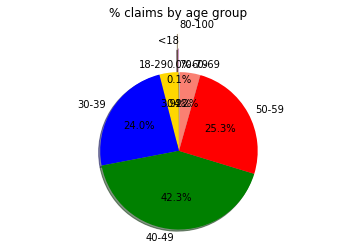

In [58]:
#pie chart 
colors=["purple","gold","blue","green","red","salmon","silver","orange"]
explode = (0.3,0,0,0,0,0,0,0.5)
plt.pie(age,colors=colors,explode=explode,labels=labels,autopct="%1.1f%%",shadow=True, startangle=90)
plt.axis("equal")
plt.title('% claims by age group')
plt.show()

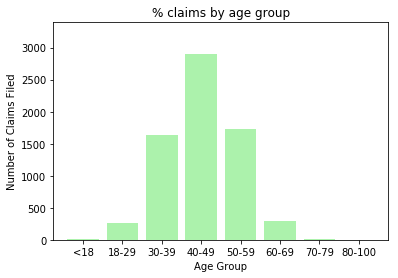

In [62]:
x_axis = np.arange(0, len(labels))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("% claims by age group")
plt.xlabel("Age Group")
plt.ylabel("Number of Claims Filed")

plt.xlim(-0.75, len(labels)-.25)
plt.ylim(0, max(age) + 500)

plt.bar(x_axis, age, facecolor="lightgreen", alpha=0.75, align="center")
plt.xticks(tick_locations, labels)
plt.show()